# Prediction Using Unsupervised ML
## Author: Passant Hamdi

In this report we will predict the optimum number of clusters for a dataset "Iris" using K-means method, and will represent it visually.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading our data and viewing it
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Finding how many different species in our data
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

To determine the optimum number of clusters we will use K-means clustering, elbow method.
The "KElbowVisualizer" fits the KMeans model for a range of K values from 1 to 10 on a sample two-dimensional dataset with 5 random clusters of points. When the model is fit with 5 clusters, we can see a line annotating the “elbow” in the graph, which in this case we know to be the optimal number.

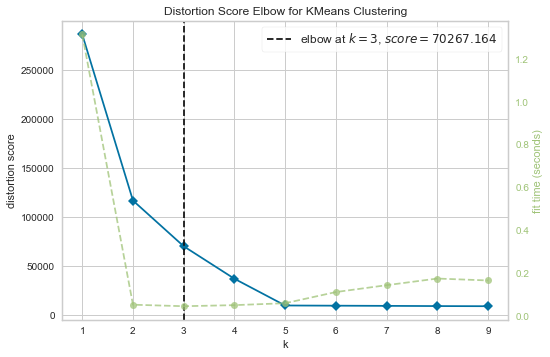

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 5 random clusters
X, y = make_blobs(n_samples=1000, n_features=10, centers=5, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

As shown above, the number of clusters will be 3

In [5]:
# Let's split our data into inputs and outputs
X = df.iloc[:, 1:5].values  
y = df.iloc[:, -1].values

In [6]:
# Now let's apply K-Means clustering to the dataset
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3)
model.fit(X)

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

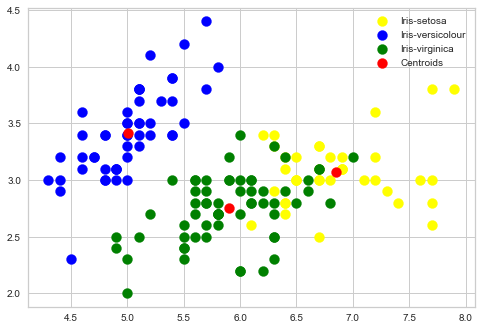

In [7]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend();